# SVM  Salary (train_data)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
salary=pd.read_csv("SalaryData_Train(1).csv")

In [3]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
salary['workclass']=salary['workclass'].astype('category')
salary['education']=salary['education'].astype('category')
salary['maritalstatus']=salary['maritalstatus'].astype('category')
salary['occupation']=salary['occupation'].astype('category')
salary['relationship']=salary['relationship'].astype('category')
salary['race']=salary['race'].astype('category')
salary['native']=salary['native'].astype('category')
salary['sex']=salary['sex'].astype('category')

In [6]:
salary.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [7]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


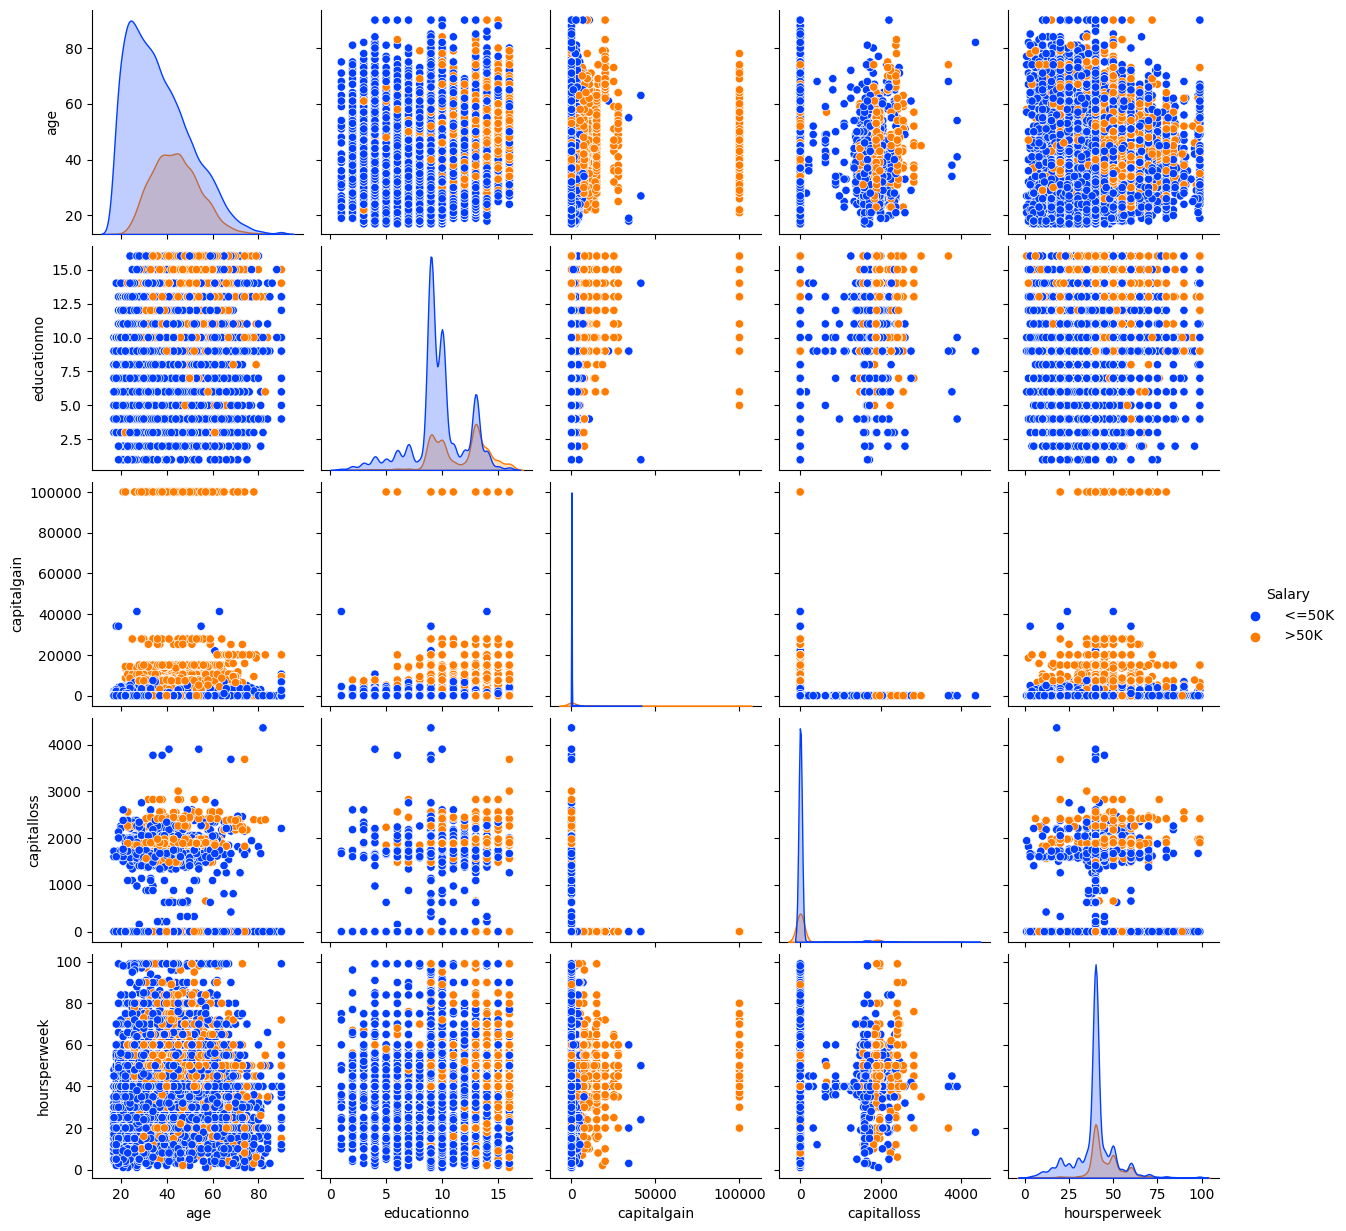

In [8]:
sns.pairplot(salary, hue="Salary",palette="bright")

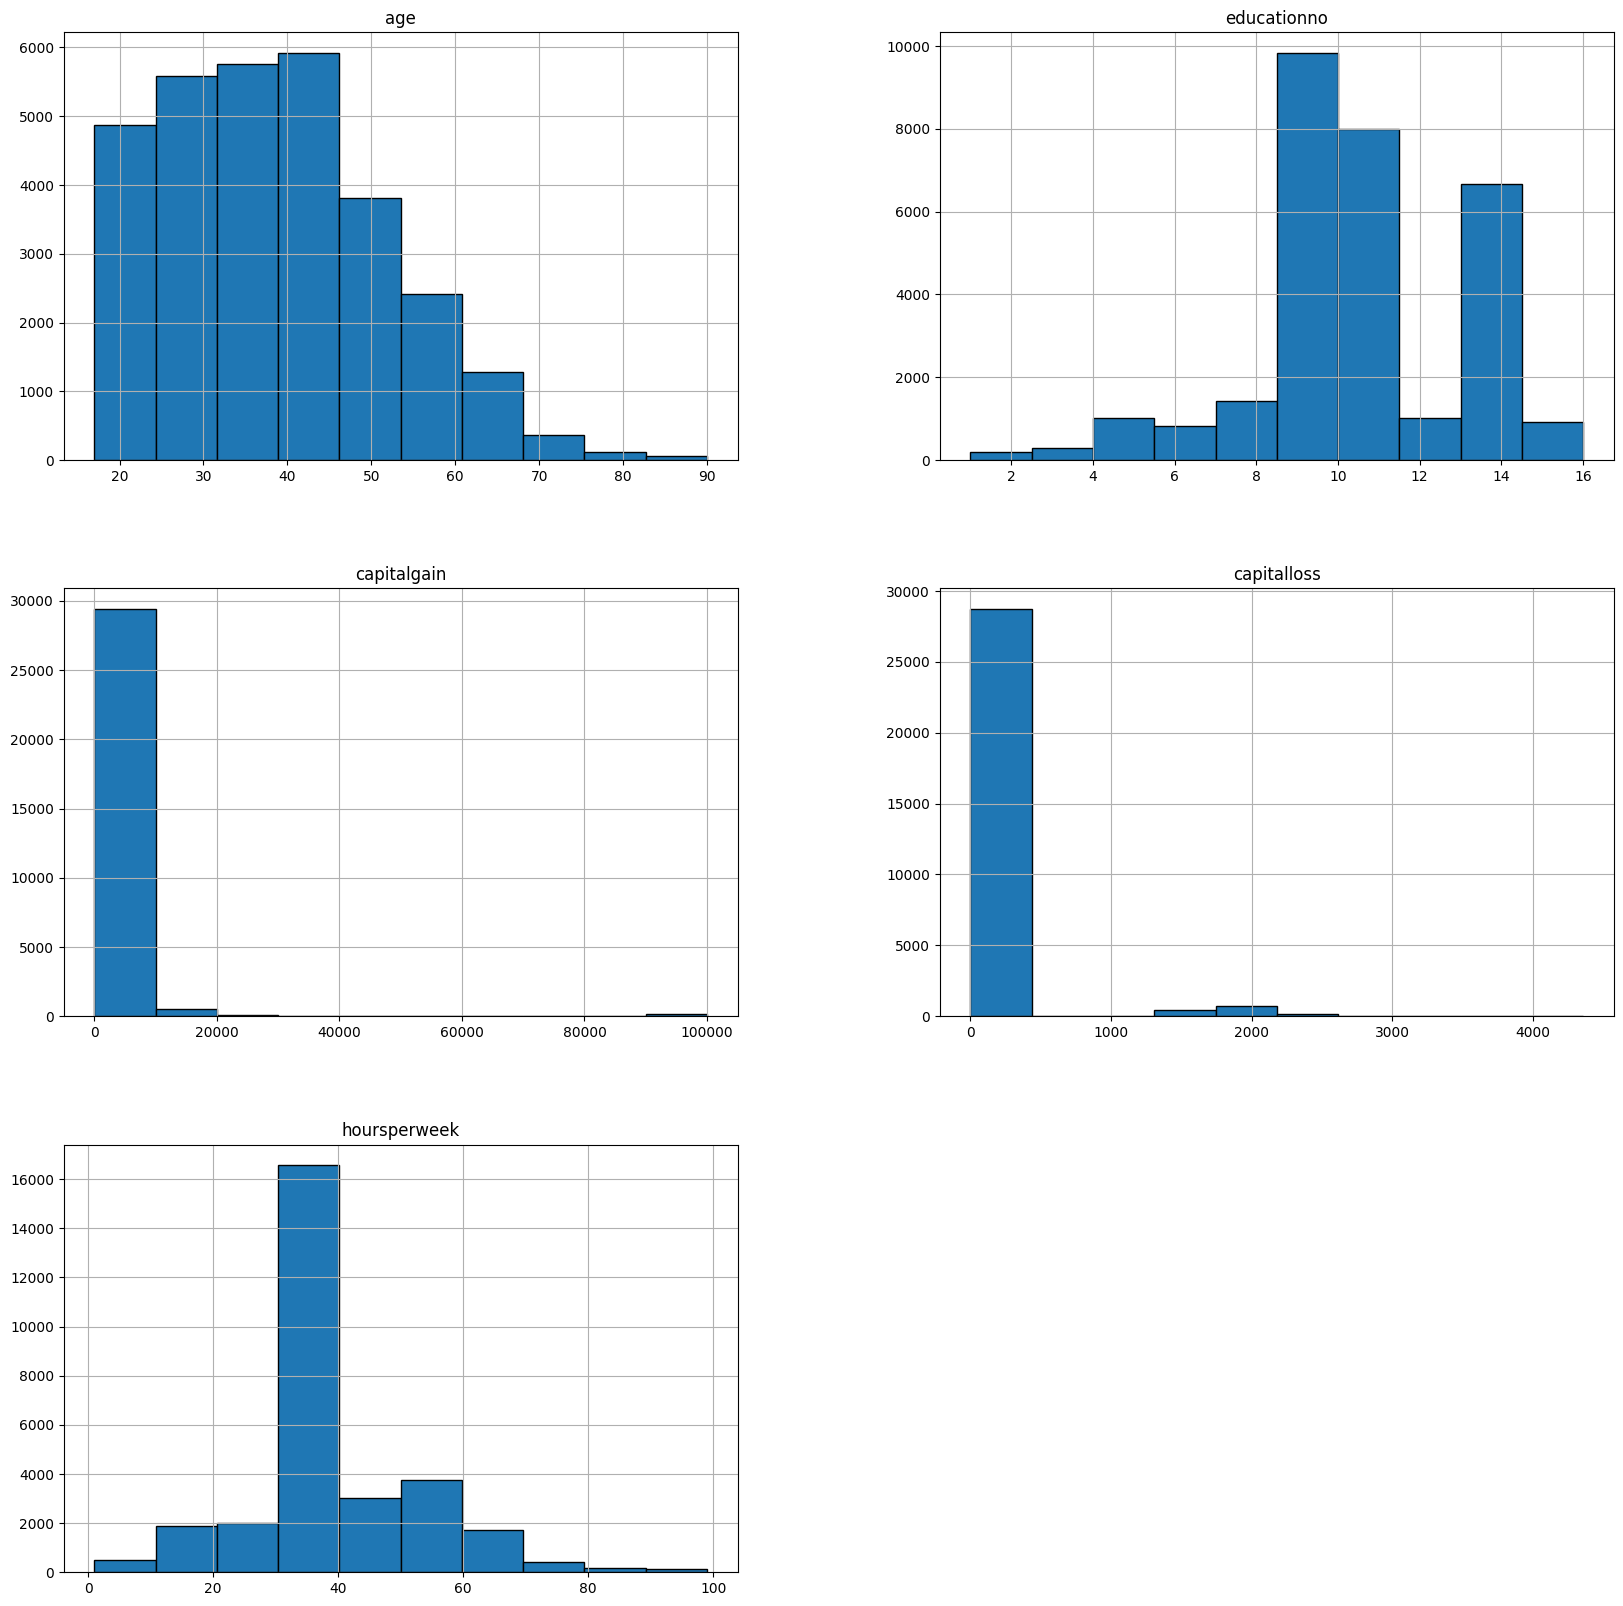

In [9]:
salary.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

In [10]:
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [11]:
salary['Salary'] = label_encoder.fit_transform(salary['Salary'])

In [12]:
salary.Salary

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

we also need to convert categories into numbers

In [13]:
salary['workclass'] = label_encoder.fit_transform(salary['workclass'])
salary['education'] = label_encoder.fit_transform(salary['education'])
salary['maritalstatus'] = label_encoder.fit_transform(salary['maritalstatus'])
salary['occupation'] = label_encoder.fit_transform(salary['occupation'])
salary['relationship'] = label_encoder.fit_transform(salary['relationship'])
salary['race'] = label_encoder.fit_transform(salary['race'])
salary['sex'] = label_encoder.fit_transform(salary['sex'])
salary['native'] = label_encoder.fit_transform(salary['native'])


In [14]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [15]:
# Splitting the data into x and y as input and output

X = salary.iloc[:,0:13]
Y = salary.iloc[:,13]

In [16]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [17]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [18]:
salary.Salary.unique()

array([0, 1])

In [19]:
salary.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [20]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [21]:
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 79.23527461597966


array([[6580,  218],
       [1661,  590]], dtype=int64)

In [22]:
y_pred=clf.predict(x_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# SVM  Salary (test_data)

In [24]:
salary=pd.read_csv("SalaryData_Test(1).csv")

In [25]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [26]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [27]:
salary['workclass']=salary['workclass'].astype('category')
salary['education']=salary['education'].astype('category')
salary['maritalstatus']=salary['maritalstatus'].astype('category')
salary['occupation']=salary['occupation'].astype('category')
salary['relationship']=salary['relationship'].astype('category')
salary['race']=salary['race'].astype('category')
salary['native']=salary['native'].astype('category')
salary['sex']=salary['sex'].astype('category')

In [28]:
salary.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [29]:
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [30]:
salary['Salary'] = label_encoder.fit_transform(salary['Salary'])

In [31]:
salary.Salary

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [32]:
#we also need to convert categories into numbers
salary['workclass'] = label_encoder.fit_transform(salary['workclass'])
salary['education'] = label_encoder.fit_transform(salary['education'])
salary['maritalstatus'] = label_encoder.fit_transform(salary['maritalstatus'])
salary['occupation'] = label_encoder.fit_transform(salary['occupation'])
salary['relationship'] = label_encoder.fit_transform(salary['relationship'])
salary['race'] = label_encoder.fit_transform(salary['race'])
salary['sex'] = label_encoder.fit_transform(salary['sex'])
salary['native'] = label_encoder.fit_transform(salary['native'])

In [33]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [34]:
#define x&y

X = salary.iloc[:,0:13]
Y = salary.iloc[:,13]

In [35]:
X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [36]:
Y

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [37]:
salary.Salary.unique()

array([0, 1])

In [38]:
salary.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [39]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [40]:
#model building by using SVM
clf=SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 79.6812749003984


array([[3290,   95],
       [ 823,  310]], dtype=int64)

In [41]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])